**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>
      Answer: Validation data is used to control whether model is overfitted or not.
      
  >b) What is the difference between mean squared error and mean absolute error?<br>
      Answer: MSE calculate square of the error while MAE calculate absolute and therefore, MAE works well with outliers.
      
  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>
      Answer: Sigmoid is not zero centered and it is possible that gradients can be killed.
      
  >d) What does it mean to overfit your data model?<br>
      Answer: When complexity of the model is too high, model memorize train data well but it cannot generalize.
      
  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>
      Answer: 6x31x31
      
  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)<br>
      Answer: 5767




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [21]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os
from tqdm import tqdm
root = "~/CS464_Fall21_HW3/data"

### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [22]:
class SceneDataset(Dataset):
    # TODO:
    # Define constructor for SceneDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, root): # you are free to change parameters
        self.class_num = len(os.listdir(root))
        self.root = root
        self.data = None
        self.labels = []
        label_count = -1
        print("Dataset is creating")
        for file in os.listdir(self.root):
          label_count += 1
          for image_name in tqdm(os.listdir(os.path.join(self.root, file))):
            image = Image.open(os.path.join(self.root, file, image_name))
            image = torch.tensor(np.array(image)) / 255.
            if self.data != None:
              self.data = torch.cat((self.data, torch.unsqueeze(image.permute((2,0,1)), dim =0)),dim = 0)
            else:
              self.data = torch.unsqueeze(image.permute((2,0,1)), dim = 0)
            self.labels.append(label_count)
        self.labels = torch.tensor(self.labels)
            

    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.labels.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.data[index], self.labels[index]


In [23]:
def get_dataset(root):
    # TODO: 
    # Read dataset files
    # Construct training, validation and test sets
    # Normalize datasets
    dataset = SceneDataset(root=root)
    train_ds_size = int(dataset.__len__() * 0.7)
    val_ds_size = int(dataset.__len__() * 0.1)
    test_ds_size = int(dataset.__len__() * 0.2)
    train_dataset, val_dataset,test_dataset = torch.utils.data.random_split(dataset, [train_ds_size, val_ds_size,test_ds_size])
    train_dataset
    return train_dataset, val_dataset, test_dataset


###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [24]:
from torch.nn.modules.activation import ReLU
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
      super(ConvNet,self).__init__()
      self.conv = nn.Sequential(
          nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),
          nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2))
      output_conv = self.conv(torch.randn(1,3,90,90)).reshape(1,-1).shape[-1]
      self.fc = nn.Linear(output_conv, 128)
      self.output = nn.Linear(128, 4)
      
     
    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
      out = self.conv(X).reshape(X.shape[0],-1)
      out = F.relu(self.fc(out))
      out = F.softmax(self.output(out), dim=-1)

      return out

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [25]:
# HINT: note that your training time should not take more than 2 hours.
def accuracy(target, output):
  accurate = 0
  for i in range(target.shape[0]):
    if torch.argmax(target[i]) == output[i]:
      accurate += 1
  return accurate

# TODO:
# Pick your hyper parameters
max_epoch = 50
train_batch = 32
test_batch = 32
learning_rate = 1e-1

use_gpu = torch.cuda.is_available()
device = torch.device("cuda" if use_gpu else "cpu")

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
train_dataset, val_dataset, test_dataset = get_dataset(root)
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=train_batch, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch, shuffle=False, drop_last=True)
# initialize your network
model = ConvNet()
model = model.to(device)

# define your loss function
loss_fuc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
last_val_acc = None
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(max_epoch):
    train_accurate = 0
    val_accurate = 0
    print(f"Epoch {epoch + 1}")
    model=model.train()
    train_loss = 0
    val_loss = 0
    train_idx = 0
    #    iterate over training batches
    for x,y in tqdm(train_loader):
      train_idx += 1
      x = x.to(device)
      y = y.to(device)

      optimizer.zero_grad()
      output = model(x)
      batch_loss = loss_fuc(output, y)
      train_loss += batch_loss
      train_accurate += accuracy(output, y)

      batch_loss.backward()
      optimizer.step()
    train_accuracy = train_accurate / (train_idx * train_batch)
    print(f"Train Loss {train_loss}")
    print("Train Accuracy {:.2f}%".format(train_accuracy * 100))
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    # #    Validation
    model = model.eval()
    with torch.no_grad():
    #     iterate over validation batches
      val_idx = 0
      for x,y in tqdm(val_loader):
        val_idx += 1
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        batch_loss = loss_fuc(output, y)
        val_loss += batch_loss
        val_accurate += accuracy(output, y)
      val_accuracy = val_accurate / (val_idx * train_batch)
      if last_val_acc == None or val_accuracy > last_val_acc:
        last_val_acc = val_accuracy
        torch.save(model, "~/CS464_Fall21_HW3/best_cnn_sgd.pth")
        print("Best Model Saved!")
      print(f"Validation Loss {val_loss}")
      print("Validation Accuracy {:.2f}%".format(val_accuracy * 100))
      val_accuracies.append(val_accuracy)
      val_losses.append(val_loss)



Dataset is creating


100%|██████████| 2500/2500 [08:28<00:00,  4.91it/s]


Epoch 1


100%|██████████| 218/218 [00:06<00:00, 32.24it/s]


Train Loss 273.3970031738281
Train Accuracy 45.61%


100%|██████████| 31/31 [00:00<00:00, 51.17it/s]


Best Model Saved!
Validation Loss 34.13933563232422
Validation Accuracy 62.40%
Epoch 2


100%|██████████| 218/218 [00:06<00:00, 33.28it/s]


Train Loss 246.8282470703125
Train Accuracy 59.69%


100%|██████████| 31/31 [00:00<00:00, 50.21it/s]


Best Model Saved!
Validation Loss 33.557701110839844
Validation Accuracy 65.42%
Epoch 3


100%|██████████| 218/218 [00:06<00:00, 33.07it/s]


Train Loss 243.4304962158203
Train Accuracy 61.60%


100%|██████████| 31/31 [00:00<00:00, 50.29it/s]


Best Model Saved!
Validation Loss 33.29669952392578
Validation Accuracy 65.73%
Epoch 4


100%|██████████| 218/218 [00:06<00:00, 33.21it/s]


Train Loss 240.8866729736328
Train Accuracy 62.84%


100%|██████████| 31/31 [00:00<00:00, 49.72it/s]


Validation Loss 33.77656555175781
Validation Accuracy 63.81%
Epoch 5


100%|██████████| 218/218 [00:06<00:00, 33.08it/s]


Train Loss 238.2764434814453
Train Accuracy 63.85%


100%|██████████| 31/31 [00:00<00:00, 50.80it/s]


Best Model Saved!
Validation Loss 33.1826057434082
Validation Accuracy 68.55%
Epoch 6


100%|██████████| 218/218 [00:06<00:00, 33.08it/s]


Train Loss 235.37625122070312
Train Accuracy 65.54%


100%|██████████| 31/31 [00:00<00:00, 50.47it/s]


Validation Loss 32.53479766845703
Validation Accuracy 68.15%
Epoch 7


100%|██████████| 218/218 [00:06<00:00, 33.17it/s]


Train Loss 235.57688903808594
Train Accuracy 65.45%


100%|██████████| 31/31 [00:00<00:00, 50.42it/s]


Validation Loss 32.75518798828125
Validation Accuracy 67.54%
Epoch 8


100%|██████████| 218/218 [00:06<00:00, 33.08it/s]


Train Loss 231.01751708984375
Train Accuracy 67.57%


100%|██████████| 31/31 [00:00<00:00, 50.05it/s]


Best Model Saved!
Validation Loss 31.92091178894043
Validation Accuracy 70.56%
Epoch 9


100%|██████████| 218/218 [00:06<00:00, 33.16it/s]


Train Loss 228.50157165527344
Train Accuracy 68.55%


100%|██████████| 31/31 [00:00<00:00, 50.87it/s]


Validation Loss 32.38589096069336
Validation Accuracy 68.55%
Epoch 10


100%|██████████| 218/218 [00:06<00:00, 33.25it/s]


Train Loss 224.95143127441406
Train Accuracy 70.51%


100%|██████████| 31/31 [00:00<00:00, 50.61it/s]


Best Model Saved!
Validation Loss 31.62520980834961
Validation Accuracy 72.08%
Epoch 11


100%|██████████| 218/218 [00:06<00:00, 33.15it/s]


Train Loss 223.70489501953125
Train Accuracy 71.29%


100%|██████████| 31/31 [00:00<00:00, 50.78it/s]


Validation Loss 32.682132720947266
Validation Accuracy 67.64%
Epoch 12


100%|██████████| 218/218 [00:06<00:00, 33.25it/s]


Train Loss 221.42538452148438
Train Accuracy 72.36%


100%|██████████| 31/31 [00:00<00:00, 48.49it/s]


Validation Loss 31.68645668029785
Validation Accuracy 71.57%
Epoch 13


100%|██████████| 218/218 [00:06<00:00, 33.24it/s]


Train Loss 219.29518127441406
Train Accuracy 73.45%


100%|██████████| 31/31 [00:00<00:00, 50.87it/s]


Best Model Saved!
Validation Loss 31.121273040771484
Validation Accuracy 72.78%
Epoch 14


100%|██████████| 218/218 [00:06<00:00, 32.96it/s]


Train Loss 217.22610473632812
Train Accuracy 74.07%


100%|██████████| 31/31 [00:00<00:00, 50.78it/s]


Best Model Saved!
Validation Loss 30.781883239746094
Validation Accuracy 75.30%
Epoch 15


100%|██████████| 218/218 [00:06<00:00, 33.28it/s]


Train Loss 215.82386779785156
Train Accuracy 74.94%


100%|██████████| 31/31 [00:00<00:00, 49.76it/s]


Validation Loss 31.391748428344727
Validation Accuracy 72.28%
Epoch 16


100%|██████████| 218/218 [00:06<00:00, 33.23it/s]


Train Loss 213.32147216796875
Train Accuracy 76.15%


100%|██████████| 31/31 [00:00<00:00, 50.54it/s]


Validation Loss 30.863323211669922
Validation Accuracy 74.40%
Epoch 17


100%|██████████| 218/218 [00:06<00:00, 33.11it/s]


Train Loss 210.1697540283203
Train Accuracy 77.57%


100%|██████████| 31/31 [00:00<00:00, 50.59it/s]


Validation Loss 31.084442138671875
Validation Accuracy 73.39%
Epoch 18


100%|██████████| 218/218 [00:06<00:00, 33.28it/s]


Train Loss 207.98141479492188
Train Accuracy 78.56%


100%|██████████| 31/31 [00:00<00:00, 50.37it/s]


Validation Loss 31.20626449584961
Validation Accuracy 73.29%
Epoch 19


100%|██████████| 218/218 [00:06<00:00, 33.21it/s]


Train Loss 205.35693359375
Train Accuracy 80.23%


100%|██████████| 31/31 [00:00<00:00, 50.54it/s]


Validation Loss 30.89286231994629
Validation Accuracy 73.39%
Epoch 20


100%|██████████| 218/218 [00:06<00:00, 33.16it/s]


Train Loss 203.91851806640625
Train Accuracy 80.79%


100%|██████████| 31/31 [00:00<00:00, 50.61it/s]


Validation Loss 31.042085647583008
Validation Accuracy 73.39%
Epoch 21


100%|██████████| 218/218 [00:06<00:00, 33.09it/s]


Train Loss 200.5277557373047
Train Accuracy 82.61%


100%|██████████| 31/31 [00:00<00:00, 49.34it/s]


Validation Loss 30.547197341918945
Validation Accuracy 75.20%
Epoch 22


100%|██████████| 218/218 [00:06<00:00, 33.18it/s]


Train Loss 199.1833038330078
Train Accuracy 83.13%


100%|██████████| 31/31 [00:00<00:00, 50.65it/s]


Best Model Saved!
Validation Loss 30.603546142578125
Validation Accuracy 75.60%
Epoch 23


100%|██████████| 218/218 [00:06<00:00, 33.16it/s]


Train Loss 196.69041442871094
Train Accuracy 84.35%


100%|██████████| 31/31 [00:00<00:00, 50.68it/s]


Validation Loss 30.7111873626709
Validation Accuracy 75.40%
Epoch 24


100%|██████████| 218/218 [00:06<00:00, 33.21it/s]


Train Loss 196.47702026367188
Train Accuracy 84.26%


100%|██████████| 31/31 [00:00<00:00, 50.37it/s]


Validation Loss 30.542091369628906
Validation Accuracy 75.50%
Epoch 25


100%|██████████| 218/218 [00:06<00:00, 33.30it/s]


Train Loss 193.81954956054688
Train Accuracy 85.55%


100%|██████████| 31/31 [00:00<00:00, 49.42it/s]


Validation Loss 30.662864685058594
Validation Accuracy 75.10%
Epoch 26


100%|██████████| 218/218 [00:06<00:00, 33.07it/s]


Train Loss 190.60670471191406
Train Accuracy 87.20%


100%|██████████| 31/31 [00:00<00:00, 50.62it/s]


Validation Loss 30.7091064453125
Validation Accuracy 74.90%
Epoch 27


100%|██████████| 218/218 [00:06<00:00, 33.13it/s]


Train Loss 189.1560516357422
Train Accuracy 87.96%


100%|██████████| 31/31 [00:00<00:00, 50.30it/s]


Best Model Saved!
Validation Loss 30.46815299987793
Validation Accuracy 75.81%
Epoch 28


100%|██████████| 218/218 [00:06<00:00, 33.09it/s]


Train Loss 187.80780029296875
Train Accuracy 88.23%


100%|██████████| 31/31 [00:00<00:00, 50.54it/s]


Validation Loss 30.467727661132812
Validation Accuracy 75.10%
Epoch 29


100%|██████████| 218/218 [00:06<00:00, 33.16it/s]


Train Loss 186.04962158203125
Train Accuracy 89.12%


100%|██████████| 31/31 [00:00<00:00, 50.79it/s]


Validation Loss 30.461942672729492
Validation Accuracy 75.30%
Epoch 30


100%|██████████| 218/218 [00:06<00:00, 33.15it/s]


Train Loss 184.94729614257812
Train Accuracy 89.76%


100%|██████████| 31/31 [00:00<00:00, 50.51it/s]


Best Model Saved!
Validation Loss 30.167552947998047
Validation Accuracy 76.61%
Epoch 31


100%|██████████| 218/218 [00:06<00:00, 33.17it/s]


Train Loss 184.00949096679688
Train Accuracy 90.25%


100%|██████████| 31/31 [00:00<00:00, 50.55it/s]


Validation Loss 30.495460510253906
Validation Accuracy 75.10%
Epoch 32


100%|██████████| 218/218 [00:06<00:00, 33.14it/s]


Train Loss 182.4943084716797
Train Accuracy 90.95%


100%|██████████| 31/31 [00:00<00:00, 48.87it/s]


Validation Loss 30.482421875
Validation Accuracy 75.81%
Epoch 33


100%|██████████| 218/218 [00:06<00:00, 33.06it/s]


Train Loss 182.16651916503906
Train Accuracy 90.98%


100%|██████████| 31/31 [00:00<00:00, 50.87it/s]


Best Model Saved!
Validation Loss 29.918231964111328
Validation Accuracy 77.62%
Epoch 34


100%|██████████| 218/218 [00:06<00:00, 32.95it/s]


Train Loss 180.88990783691406
Train Accuracy 91.64%


100%|██████████| 31/31 [00:00<00:00, 49.10it/s]


Validation Loss 30.250961303710938
Validation Accuracy 76.11%
Epoch 35


100%|██████████| 218/218 [00:06<00:00, 32.98it/s]


Train Loss 180.93235778808594
Train Accuracy 91.46%


100%|██████████| 31/31 [00:00<00:00, 50.96it/s]


Validation Loss 30.400022506713867
Validation Accuracy 75.91%
Epoch 36


100%|██████████| 218/218 [00:06<00:00, 33.14it/s]


Train Loss 180.02593994140625
Train Accuracy 92.00%


100%|██████████| 31/31 [00:00<00:00, 50.43it/s]


Validation Loss 30.757389068603516
Validation Accuracy 74.09%
Epoch 37


100%|██████████| 218/218 [00:06<00:00, 33.06it/s]


Train Loss 179.24571228027344
Train Accuracy 92.39%


100%|██████████| 31/31 [00:00<00:00, 50.05it/s]


Validation Loss 30.629011154174805
Validation Accuracy 74.90%
Epoch 38


100%|██████████| 218/218 [00:06<00:00, 33.11it/s]


Train Loss 178.6400909423828
Train Accuracy 92.57%


100%|██████████| 31/31 [00:00<00:00, 49.93it/s]


Validation Loss 30.30038833618164
Validation Accuracy 75.60%
Epoch 39


100%|██████████| 218/218 [00:06<00:00, 33.18it/s]


Train Loss 178.04803466796875
Train Accuracy 92.85%


100%|██████████| 31/31 [00:00<00:00, 50.62it/s]


Validation Loss 30.38765525817871
Validation Accuracy 75.91%
Epoch 40


100%|██████████| 218/218 [00:06<00:00, 32.94it/s]


Train Loss 177.9086151123047
Train Accuracy 92.92%


100%|██████████| 31/31 [00:00<00:00, 50.46it/s]


Validation Loss 30.009870529174805
Validation Accuracy 76.92%
Epoch 41


100%|██████████| 218/218 [00:06<00:00, 33.06it/s]


Train Loss 177.00941467285156
Train Accuracy 93.22%


100%|██████████| 31/31 [00:00<00:00, 50.30it/s]


Validation Loss 30.128374099731445
Validation Accuracy 76.51%
Epoch 42


100%|██████████| 218/218 [00:06<00:00, 32.97it/s]


Train Loss 176.8450469970703
Train Accuracy 93.39%


100%|██████████| 31/31 [00:00<00:00, 49.57it/s]


Validation Loss 30.60763168334961
Validation Accuracy 75.30%
Epoch 43


100%|██████████| 218/218 [00:06<00:00, 33.09it/s]


Train Loss 177.52102661132812
Train Accuracy 93.09%


100%|██████████| 31/31 [00:00<00:00, 50.21it/s]


Validation Loss 30.754749298095703
Validation Accuracy 74.29%
Epoch 44


100%|██████████| 218/218 [00:06<00:00, 33.11it/s]


Train Loss 175.95974731445312
Train Accuracy 93.82%


100%|██████████| 31/31 [00:00<00:00, 50.53it/s]


Validation Loss 30.41678237915039
Validation Accuracy 75.40%
Epoch 45


100%|██████████| 218/218 [00:06<00:00, 33.21it/s]


Train Loss 175.32876586914062
Train Accuracy 94.04%


100%|██████████| 31/31 [00:00<00:00, 49.76it/s]


Validation Loss 30.297090530395508
Validation Accuracy 76.31%
Epoch 46


100%|██████████| 218/218 [00:06<00:00, 33.18it/s]


Train Loss 175.03700256347656
Train Accuracy 94.15%


100%|██████████| 31/31 [00:00<00:00, 50.87it/s]


Validation Loss 30.477760314941406
Validation Accuracy 75.71%
Epoch 47


100%|██████████| 218/218 [00:06<00:00, 33.21it/s]


Train Loss 175.08193969726562
Train Accuracy 94.21%


100%|██████████| 31/31 [00:00<00:00, 50.74it/s]


Validation Loss 30.50608253479004
Validation Accuracy 75.71%
Epoch 48


100%|██████████| 218/218 [00:06<00:00, 33.14it/s]


Train Loss 174.57479858398438
Train Accuracy 94.38%


100%|██████████| 31/31 [00:00<00:00, 50.21it/s]


Validation Loss 30.16799545288086
Validation Accuracy 76.92%
Epoch 49


100%|██████████| 218/218 [00:06<00:00, 33.24it/s]


Train Loss 174.39797973632812
Train Accuracy 94.41%


100%|██████████| 31/31 [00:00<00:00, 50.05it/s]


Validation Loss 30.19173240661621
Validation Accuracy 76.51%
Epoch 50


100%|██████████| 218/218 [00:06<00:00, 33.02it/s]


Train Loss 174.5202178955078
Train Accuracy 94.42%


100%|██████████| 31/31 [00:00<00:00, 50.10it/s]

Validation Loss 30.324405670166016
Validation Accuracy 76.31%


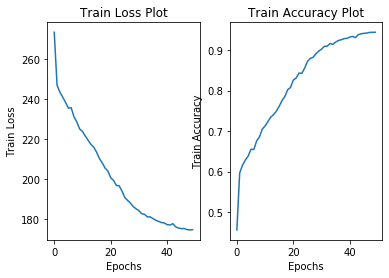

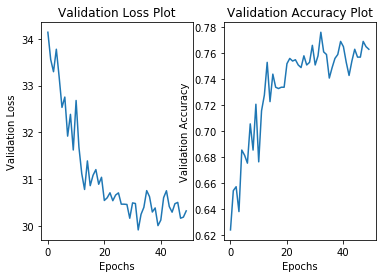

In [26]:
# Train
plt.subplot(1,2,1)
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Train Loss Plot")
plt.subplot(1,2,2)
plt.plot(train_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy Plot")
plt.show()

# Validation
plt.subplot(1,2,1)
plt.plot(val_losses)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Plot")
plt.subplot(1,2,2)
plt.plot(val_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Plot")
plt.show()

####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

100%|██████████| 62/62 [00:01<00:00, 56.16it/s]


Mean Loss: tensor(0.9968, device='cuda:0') 
Mean Acc: 0.7394153225806451 
Mean Macro Precision: 0.7363813172235233 
Mean Macro Recall: 0.7379441051352595 
Mean Macro F1 Score: 0.7354736519542935


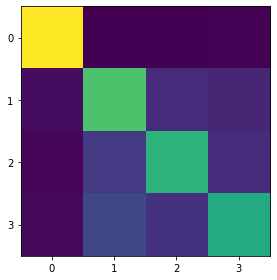

In [40]:
# Test CNN
# load best model
best_path = "~/CS464_Fall21_HW3/best_cnn_sgd.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
with torch.no_grad():
# iterate over test batches
  test_idx = 0
  y_true = None
  y_pred = None
  test_loss = 0
  for x,y in tqdm(test_loader):
    test_idx += 1
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    batch_loss = loss_fuc(output, y)
    test_loss += batch_loss
    if test_idx == 1:
      y_true = y.cpu().numpy()
      y_pred = np.argmax(output.cpu().numpy(), axis=-1)
    else:
      y_true = np.concatenate((y_true, y.cpu().numpy()), axis=-1)
      y_pred = np.concatenate((y_pred, np.argmax(output.cpu().numpy(), axis=-1)), axis=-1)

  losses = test_loss / test_idx
#   get confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
#   calculate accuracy
acc = accuracy_score(y_true, y_pred)
#   calculate precision
pre = precision_score(y_true, y_pred, average='macro')
#   calculate recall
recall = recall_score(y_true, y_pred, average='macro')
#   calculate F1 score
f1 = f1_score(y_true, y_pred, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [41]:
# HINT: note that your training time should not take more than 2 hours.
max_epoch = 50
train_batch = 32
test_batch = 32
learning_rate = 1e-3

use_gpu = torch.cuda.is_available()
device = torch.device("cuda" if use_gpu else "cpu")

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=train_batch, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch, shuffle=False, drop_last=True)
# initialize your network
model = ConvNet()
model = model.to(device)

# define your loss function
loss_fuc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
last_val_acc = None
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(max_epoch):
  try:
    train_accurate = 0
    val_accurate = 0
    print(f"Epoch {epoch + 1}")
    model=model.train()
    train_loss = 0
    val_loss = 0
    train_idx = 0
    #    iterate over training batches
    for x,y in tqdm(train_loader):
      train_idx += 1
      x = x.to(device)
      y = y.to(device)

      optimizer.zero_grad()
      output = model(x)
      batch_loss = loss_fuc(output, y)
      train_loss += batch_loss
      train_accurate += accuracy(output, y)

      batch_loss.backward()
      optimizer.step()
    train_accuracy = train_accurate / (train_idx * train_batch)
    print(f"Train Loss {train_loss}")
    print("Train Accuracy {:.2f}%".format(train_accuracy * 100))
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    # #    Validation
    model = model.eval()
    with torch.no_grad():
    #     iterate over validation batches
      val_idx = 0
      for x,y in tqdm(val_loader):
        val_idx += 1
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        batch_loss = loss_fuc(output, y)
        val_loss += batch_loss
        val_accurate += accuracy(output, y)
      val_accuracy = val_accurate / (val_idx * train_batch)
      if last_val_acc == None or val_accuracy > last_val_acc:
        last_val_acc = val_accuracy
        torch.save(model, "~/CS464_Fall21_HW3/best_cnn_adam.pth")
        print("Best Model Saved!")
      print(f"Validation Loss {val_loss}")
      print("Validation Accuracy {:.2f}%".format(val_accuracy * 100))
      val_accuracies.append(val_accuracy)
      val_losses.append(val_loss)
  except KeyboardInterrupt:
    pass



Epoch 1


100%|██████████| 218/218 [00:07<00:00, 30.97it/s]


Train Loss 243.6742401123047
Train Accuracy 61.01%


100%|██████████| 31/31 [00:00<00:00, 50.77it/s]


Best Model Saved!
Validation Loss 32.13557815551758
Validation Accuracy 70.16%
Epoch 2


100%|██████████| 218/218 [00:06<00:00, 31.91it/s]


Train Loss 228.3968963623047
Train Accuracy 69.22%


100%|██████████| 31/31 [00:00<00:00, 49.24it/s]


Validation Loss 32.40306091308594
Validation Accuracy 69.56%
Epoch 3


100%|██████████| 218/218 [00:06<00:00, 31.84it/s]


Train Loss 227.12216186523438
Train Accuracy 69.85%


100%|██████████| 31/31 [00:00<00:00, 49.74it/s]


Best Model Saved!
Validation Loss 31.206344604492188
Validation Accuracy 73.59%
Epoch 4


100%|██████████| 218/218 [00:06<00:00, 31.82it/s]


Train Loss 223.662109375
Train Accuracy 71.37%


100%|██████████| 31/31 [00:00<00:00, 49.60it/s]


Validation Loss 31.334598541259766
Validation Accuracy 72.88%
Epoch 5


100%|██████████| 218/218 [00:06<00:00, 31.89it/s]


Train Loss 222.5502166748047
Train Accuracy 71.75%


100%|██████████| 31/31 [00:00<00:00, 49.01it/s]


Best Model Saved!
Validation Loss 30.74983024597168
Validation Accuracy 74.50%
Epoch 6


100%|██████████| 218/218 [00:06<00:00, 31.73it/s]


Train Loss 221.3878936767578
Train Accuracy 72.29%


100%|██████████| 31/31 [00:00<00:00, 49.75it/s]


Validation Loss 31.527685165405273
Validation Accuracy 71.37%
Epoch 7


100%|██████████| 218/218 [00:06<00:00, 31.81it/s]


Train Loss 219.2755889892578
Train Accuracy 73.44%


100%|██████████| 31/31 [00:00<00:00, 49.89it/s]


Validation Loss 31.157373428344727
Validation Accuracy 73.59%
Epoch 8


100%|██████████| 218/218 [00:06<00:00, 31.73it/s]


Train Loss 217.4550018310547
Train Accuracy 74.25%


100%|██████████| 31/31 [00:00<00:00, 48.99it/s]


Best Model Saved!
Validation Loss 30.389802932739258
Validation Accuracy 75.91%
Epoch 9


100%|██████████| 218/218 [00:06<00:00, 31.84it/s]


Train Loss 215.71885681152344
Train Accuracy 74.96%


100%|██████████| 31/31 [00:00<00:00, 49.65it/s]


Validation Loss 30.454635620117188
Validation Accuracy 75.60%
Epoch 10


100%|██████████| 218/218 [00:06<00:00, 31.83it/s]


Train Loss 216.7080078125
Train Accuracy 74.54%


100%|██████████| 31/31 [00:00<00:00, 50.32it/s]


Validation Loss 31.38385772705078
Validation Accuracy 72.58%
Epoch 11


100%|██████████| 218/218 [00:06<00:00, 31.89it/s]


Train Loss 213.12457275390625
Train Accuracy 76.26%


100%|██████████| 31/31 [00:00<00:00, 50.05it/s]


Validation Loss 30.729040145874023
Validation Accuracy 74.70%
Epoch 12


100%|██████████| 218/218 [00:06<00:00, 31.64it/s]


Train Loss 212.35983276367188
Train Accuracy 77.04%


100%|██████████| 31/31 [00:00<00:00, 50.20it/s]


Best Model Saved!
Validation Loss 30.365938186645508
Validation Accuracy 76.21%
Epoch 13


100%|██████████| 218/218 [00:06<00:00, 31.83it/s]


Train Loss 212.36767578125
Train Accuracy 76.76%


100%|██████████| 31/31 [00:00<00:00, 50.87it/s]


Best Model Saved!
Validation Loss 29.984580993652344
Validation Accuracy 77.52%
Epoch 14


100%|██████████| 218/218 [00:06<00:00, 31.90it/s]


Train Loss 210.07054138183594
Train Accuracy 77.81%


100%|██████████| 31/31 [00:00<00:00, 50.38it/s]


Best Model Saved!
Validation Loss 29.883455276489258
Validation Accuracy 77.92%
Epoch 15


100%|██████████| 218/218 [00:06<00:00, 31.90it/s]


Train Loss 208.736572265625
Train Accuracy 78.21%


100%|██████████| 31/31 [00:00<00:00, 50.71it/s]


Validation Loss 30.156572341918945
Validation Accuracy 77.02%
Epoch 16


100%|██████████| 218/218 [00:06<00:00, 31.83it/s]


Train Loss 211.29953002929688
Train Accuracy 77.25%


100%|██████████| 31/31 [00:00<00:00, 50.18it/s]


Best Model Saved!
Validation Loss 29.550460815429688
Validation Accuracy 78.53%
Epoch 17


100%|██████████| 218/218 [00:06<00:00, 31.79it/s]


Train Loss 207.17127990722656
Train Accuracy 79.21%


100%|██████████| 31/31 [00:00<00:00, 50.26it/s]


Best Model Saved!
Validation Loss 29.506431579589844
Validation Accuracy 78.73%
Epoch 18


100%|██████████| 218/218 [00:06<00:00, 31.74it/s]


Train Loss 205.5535888671875
Train Accuracy 80.16%


100%|██████████| 31/31 [00:00<00:00, 49.81it/s]


Validation Loss 30.58582305908203
Validation Accuracy 75.00%
Epoch 19


100%|██████████| 218/218 [00:06<00:00, 31.90it/s]


Train Loss 207.04794311523438
Train Accuracy 79.17%


100%|██████████| 31/31 [00:00<00:00, 50.42it/s]


Validation Loss 30.033231735229492
Validation Accuracy 76.21%
Epoch 20


100%|██████████| 218/218 [00:06<00:00, 31.87it/s]


Train Loss 203.89804077148438
Train Accuracy 80.83%


100%|██████████| 31/31 [00:00<00:00, 50.46it/s]


Best Model Saved!
Validation Loss 29.538097381591797
Validation Accuracy 79.03%
Epoch 21


100%|██████████| 218/218 [00:06<00:00, 31.89it/s]


Train Loss 202.24288940429688
Train Accuracy 81.77%


100%|██████████| 31/31 [00:00<00:00, 50.46it/s]


Validation Loss 29.908462524414062
Validation Accuracy 76.81%
Epoch 22


100%|██████████| 218/218 [00:06<00:00, 31.83it/s]


Train Loss 201.01451110839844
Train Accuracy 82.45%


100%|██████████| 31/31 [00:00<00:00, 50.08it/s]


Best Model Saved!
Validation Loss 29.22307777404785
Validation Accuracy 79.84%
Epoch 23


100%|██████████| 218/218 [00:06<00:00, 31.78it/s]


Train Loss 199.63816833496094
Train Accuracy 83.10%


100%|██████████| 31/31 [00:00<00:00, 50.15it/s]


Best Model Saved!
Validation Loss 29.039148330688477
Validation Accuracy 80.04%
Epoch 24


100%|██████████| 218/218 [00:06<00:00, 31.80it/s]


Train Loss 197.34523010253906
Train Accuracy 84.38%


100%|██████████| 31/31 [00:00<00:00, 49.50it/s]


Best Model Saved!
Validation Loss 29.29729652404785
Validation Accuracy 80.14%
Epoch 25


100%|██████████| 218/218 [00:06<00:00, 31.88it/s]


Train Loss 197.75613403320312
Train Accuracy 83.97%


100%|██████████| 31/31 [00:00<00:00, 49.04it/s]


Validation Loss 29.210365295410156
Validation Accuracy 79.94%
Epoch 26


100%|██████████| 218/218 [00:06<00:00, 31.79it/s]


Train Loss 196.06292724609375
Train Accuracy 84.99%


100%|██████████| 31/31 [00:00<00:00, 49.26it/s]


Validation Loss 29.568532943725586
Validation Accuracy 78.43%
Epoch 27


100%|██████████| 218/218 [00:06<00:00, 31.96it/s]


Train Loss 194.73178100585938
Train Accuracy 85.38%


100%|██████████| 31/31 [00:00<00:00, 49.16it/s]


Validation Loss 29.07088851928711
Validation Accuracy 80.04%
Epoch 28


100%|██████████| 218/218 [00:06<00:00, 31.93it/s]


Train Loss 192.12269592285156
Train Accuracy 86.84%


100%|██████████| 31/31 [00:00<00:00, 49.97it/s]


Best Model Saved!
Validation Loss 28.881040573120117
Validation Accuracy 80.75%
Epoch 29


100%|██████████| 218/218 [00:06<00:00, 31.69it/s]


Train Loss 190.8667449951172
Train Accuracy 87.43%


100%|██████████| 31/31 [00:00<00:00, 50.07it/s]


Best Model Saved!
Validation Loss 28.81560707092285
Validation Accuracy 81.15%
Epoch 30


100%|██████████| 218/218 [00:06<00:00, 31.93it/s]


Train Loss 189.63031005859375
Train Accuracy 87.80%


100%|██████████| 31/31 [00:00<00:00, 50.14it/s]


Best Model Saved!
Validation Loss 28.606151580810547
Validation Accuracy 81.35%
Epoch 31


100%|██████████| 218/218 [00:06<00:00, 31.89it/s]


Train Loss 188.876953125
Train Accuracy 88.35%


100%|██████████| 31/31 [00:00<00:00, 50.05it/s]


Validation Loss 28.690366744995117
Validation Accuracy 81.35%
Epoch 32


100%|██████████| 218/218 [00:06<00:00, 31.92it/s]


Train Loss 187.4434051513672
Train Accuracy 88.78%


100%|██████████| 31/31 [00:00<00:00, 50.63it/s]


Validation Loss 28.92622947692871
Validation Accuracy 80.54%
Epoch 33


100%|██████████| 218/218 [00:06<00:00, 31.83it/s]


Train Loss 186.36798095703125
Train Accuracy 89.54%


100%|██████████| 31/31 [00:00<00:00, 50.15it/s]


Best Model Saved!
Validation Loss 28.655946731567383
Validation Accuracy 81.75%
Epoch 34


100%|██████████| 218/218 [00:06<00:00, 31.96it/s]


Train Loss 184.61610412597656
Train Accuracy 90.37%


100%|██████████| 31/31 [00:00<00:00, 50.21it/s]


Validation Loss 29.098773956298828
Validation Accuracy 79.74%
Epoch 35


100%|██████████| 218/218 [00:06<00:00, 31.87it/s]


Train Loss 184.38990783691406
Train Accuracy 90.40%


100%|██████████| 31/31 [00:00<00:00, 50.45it/s]


Validation Loss 28.837818145751953
Validation Accuracy 80.34%
Epoch 36


100%|██████████| 218/218 [00:06<00:00, 31.89it/s]


Train Loss 183.5722198486328
Train Accuracy 90.57%


100%|██████████| 31/31 [00:00<00:00, 50.62it/s]


Best Model Saved!
Validation Loss 28.680936813354492
Validation Accuracy 81.85%
Epoch 37


100%|██████████| 218/218 [00:06<00:00, 31.80it/s]


Train Loss 182.42630004882812
Train Accuracy 91.34%


100%|██████████| 31/31 [00:00<00:00, 49.76it/s]


Best Model Saved!
Validation Loss 28.517745971679688
Validation Accuracy 82.06%
Epoch 38


100%|██████████| 218/218 [00:06<00:00, 31.87it/s]


Train Loss 181.8842315673828
Train Accuracy 91.54%


100%|██████████| 31/31 [00:00<00:00, 50.79it/s]


Validation Loss 28.801620483398438
Validation Accuracy 80.85%
Epoch 39


100%|██████████| 218/218 [00:06<00:00, 31.87it/s]


Train Loss 181.5967559814453
Train Accuracy 91.64%


100%|██████████| 31/31 [00:00<00:00, 49.88it/s]


Best Model Saved!
Validation Loss 28.441240310668945
Validation Accuracy 83.06%
Epoch 40


100%|██████████| 218/218 [00:06<00:00, 31.95it/s]


Train Loss 180.88739013671875
Train Accuracy 91.92%


100%|██████████| 31/31 [00:00<00:00, 49.89it/s]


Validation Loss 29.305116653442383
Validation Accuracy 79.74%
Epoch 41


100%|██████████| 218/218 [00:06<00:00, 32.03it/s]


Train Loss 181.51947021484375
Train Accuracy 91.60%


100%|██████████| 31/31 [00:00<00:00, 49.34it/s]


Validation Loss 28.56515121459961
Validation Accuracy 81.35%
Epoch 42


100%|██████████| 218/218 [00:06<00:00, 31.76it/s]


Train Loss 179.80178833007812
Train Accuracy 92.37%


100%|██████████| 31/31 [00:00<00:00, 50.71it/s]


Validation Loss 28.441434860229492
Validation Accuracy 81.96%
Epoch 43


100%|██████████| 218/218 [00:06<00:00, 31.95it/s]


Train Loss 178.00755310058594
Train Accuracy 93.19%


100%|██████████| 31/31 [00:00<00:00, 50.80it/s]


Validation Loss 28.699003219604492
Validation Accuracy 81.05%
Epoch 44


100%|██████████| 218/218 [00:06<00:00, 31.88it/s]


Train Loss 178.56092834472656
Train Accuracy 93.03%


100%|██████████| 31/31 [00:00<00:00, 49.90it/s]


Validation Loss 29.256757736206055
Validation Accuracy 79.44%
Epoch 45


100%|██████████| 218/218 [00:06<00:00, 31.86it/s]


Train Loss 179.92169189453125
Train Accuracy 92.52%


100%|██████████| 31/31 [00:00<00:00, 50.52it/s]


Validation Loss 28.432336807250977
Validation Accuracy 82.16%
Epoch 46


100%|██████████| 218/218 [00:06<00:00, 31.89it/s]


Train Loss 179.39825439453125
Train Accuracy 92.59%


100%|██████████| 31/31 [00:00<00:00, 49.40it/s]


Validation Loss 28.708988189697266
Validation Accuracy 81.35%
Epoch 47


100%|██████████| 218/218 [00:06<00:00, 31.84it/s]


Train Loss 177.70736694335938
Train Accuracy 93.33%


100%|██████████| 31/31 [00:00<00:00, 49.97it/s]


Validation Loss 28.42325210571289
Validation Accuracy 82.46%
Epoch 48


100%|██████████| 218/218 [00:06<00:00, 31.78it/s]


Train Loss 177.73146057128906
Train Accuracy 93.21%


100%|██████████| 31/31 [00:00<00:00, 50.46it/s]


Validation Loss 28.62681007385254
Validation Accuracy 81.45%
Epoch 49


100%|██████████| 218/218 [00:06<00:00, 31.85it/s]


Train Loss 177.4921875
Train Accuracy 93.29%


100%|██████████| 31/31 [00:00<00:00, 49.81it/s]


Validation Loss 28.55434799194336
Validation Accuracy 81.96%
Epoch 50


100%|██████████| 218/218 [00:06<00:00, 31.84it/s]


Train Loss 178.1750030517578
Train Accuracy 93.05%


100%|██████████| 31/31 [00:00<00:00, 50.14it/s]

Validation Loss 28.642271041870117
Validation Accuracy 81.96%


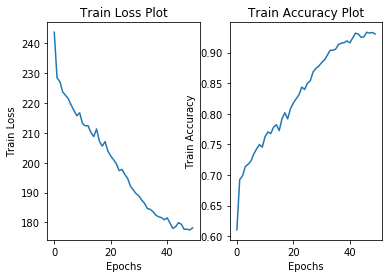

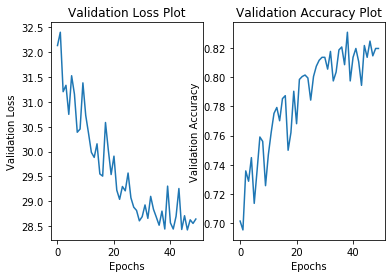

In [42]:
# Train
plt.subplot(1,2,1)
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Train Loss Plot")
plt.subplot(1,2,2)
plt.plot(train_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy Plot")
plt.show()

# Validation
plt.subplot(1,2,1)
plt.plot(val_losses)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Plot")
plt.subplot(1,2,2)
plt.plot(val_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Plot")
plt.show()

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?
Answer: Different algorithm structures were not used and therefore, it is not possible to compare these two results in terms of algorithm complexity. When dataset is used with two different optimizers, it is observed that Adam works better than SGD. The most persuasive reason is that the second moment serves as a gradient normalizer that divides the gradient by the square root of the moving average of squares of gradients. This makes Adam optimizer powerful because it is more robust. Complete train session was much more for Adam but eventually, it learns to generalize well.

100%|██████████| 62/62 [00:01<00:00, 56.57it/s]

Mean Loss: tensor(0.9517, device='cuda:0') 
Mean Acc: 0.7867943548387096 
Mean Macro Precision: 0.784938358898806 
Mean Macro Recall: 0.785306002723781 
Mean Macro F1 Score: 0.7842148347312282


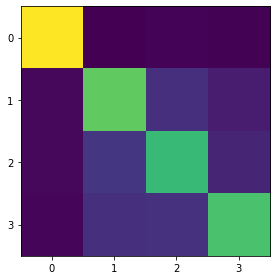

In [44]:
best_path = "~/CS464_Fall21_HW3/best_cnn_adam.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
with torch.no_grad():
# iterate over test batches
  test_idx = 0
  y_true = None
  y_pred = None
  test_loss = 0
  for x,y in tqdm(test_loader):
    test_idx += 1
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    batch_loss = loss_fuc(output, y)
    test_loss += batch_loss
    if test_idx == 1:
      y_true = y.cpu().numpy()
      y_pred = np.argmax(output.cpu().numpy(), axis=-1)
    else:
      y_true = np.concatenate((y_true, y.cpu().numpy()), axis=-1)
      y_pred = np.concatenate((y_pred, np.argmax(output.cpu().numpy(), axis=-1)), axis=-1)

  losses = test_loss / test_idx
#   get confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
#   calculate accuracy
acc = accuracy_score(y_true, y_pred)
#   calculate precision
pre = precision_score(y_true, y_pred, average='macro')
#   calculate recall
recall = recall_score(y_true, y_pred, average='macro')
#   calculate F1 score
f1 = f1_score(y_true, y_pred, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [54]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 50
train_batch = 32
test_batch = 32
learning_rate = 1e-3

use_gpu = torch.cuda.is_available()
device = torch.device("cuda" if use_gpu else "cpu")

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=train_batch, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch, shuffle=False, drop_last=True)

# initialize your network
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
# model.fc = replace its output layer with a linear layer (in_features, proper number according to your output classes)
model.fc = nn.Linear(num_features,4)
# define your loss function
loss_fuc = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.0005) # you can play with momentum and weight_decay parameters as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
last_val_acc = None
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(max_epoch):
    train_accurate = 0
    val_accurate = 0
    print(f"Epoch {epoch + 1}")
    model=model.train()
    train_loss = 0
    val_loss = 0
    train_idx = 0
    #    iterate over training batches
    for x,y in tqdm(train_loader):
      train_idx += 1

      optimizer.zero_grad()
      output = model(x)
      batch_loss = loss_fuc(output, y)
      train_loss += batch_loss
      train_accurate += accuracy(output, y)

      batch_loss.backward()
      optimizer.step()
    train_accuracy = train_accurate / (train_idx * train_batch)
    print(f"Train Loss {train_loss}")
    print("Train Accuracy {:.2f}%".format(train_accuracy * 100))
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    # #    Validation
    model = model.eval()
    with torch.no_grad():
    #     iterate over validation batches
      val_idx = 0
      for x,y in tqdm(val_loader):
        val_idx += 1

        output = model(x)
        batch_loss = loss_fuc(output, y)
        val_loss += batch_loss
        val_accurate += accuracy(output, y)
      val_accuracy = val_accurate / (val_idx * train_batch)
      if last_val_acc == None or val_accuracy > last_val_acc:
        last_val_acc = val_accuracy
        torch.save(model, "~/CS464_Fall21_HW3/best_cnn_transfer.pth")
        print("Best Model Saved!")
      print(f"Validation Loss {val_loss}")
      print("Validation Accuracy {:.2f}%".format(val_accuracy * 100))
      val_accuracies.append(val_accuracy)
      val_losses.append(val_loss)


Epoch 1


100%|██████████| 218/218 [02:26<00:00,  1.49it/s]


Train Loss 206.6658172607422
Train Accuracy 62.79%


100%|██████████| 31/31 [00:06<00:00,  4.60it/s]


Best Model Saved!
Validation Loss 17.955232620239258
Validation Accuracy 82.16%
Epoch 2


100%|██████████| 218/218 [02:28<00:00,  1.46it/s]


Train Loss 108.71653747558594
Train Accuracy 83.76%


100%|██████████| 31/31 [00:06<00:00,  4.52it/s]


Best Model Saved!
Validation Loss 12.941713333129883
Validation Accuracy 85.99%
Epoch 3


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 84.21278381347656
Train Accuracy 86.98%


100%|██████████| 31/31 [00:06<00:00,  4.49it/s]


Best Model Saved!
Validation Loss 11.135269165039062
Validation Accuracy 87.50%
Epoch 4


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 71.1156005859375
Train Accuracy 88.85%


100%|██████████| 31/31 [00:06<00:00,  4.60it/s]


Best Model Saved!
Validation Loss 9.946879386901855
Validation Accuracy 88.51%
Epoch 5


100%|██████████| 218/218 [02:32<00:00,  1.43it/s]


Train Loss 60.700504302978516
Train Accuracy 90.62%


100%|██████████| 31/31 [00:06<00:00,  4.54it/s]


Best Model Saved!
Validation Loss 9.530397415161133
Validation Accuracy 89.11%
Epoch 6


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 54.67366027832031
Train Accuracy 91.51%


100%|██████████| 31/31 [00:06<00:00,  4.61it/s]


Best Model Saved!
Validation Loss 9.102653503417969
Validation Accuracy 89.42%
Epoch 7


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 47.749359130859375
Train Accuracy 92.45%


100%|██████████| 31/31 [00:06<00:00,  4.54it/s]


Validation Loss 9.153619766235352
Validation Accuracy 89.42%
Epoch 8


100%|██████████| 218/218 [02:30<00:00,  1.45it/s]


Train Loss 45.09973907470703
Train Accuracy 93.15%


100%|██████████| 31/31 [00:06<00:00,  4.60it/s]


Best Model Saved!
Validation Loss 9.165166854858398
Validation Accuracy 89.52%
Epoch 9


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 40.30115509033203
Train Accuracy 93.68%


100%|██████████| 31/31 [00:06<00:00,  4.56it/s]


Best Model Saved!
Validation Loss 8.879110336303711
Validation Accuracy 89.72%
Epoch 10


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 36.95170211791992
Train Accuracy 94.42%


100%|██████████| 31/31 [00:06<00:00,  4.47it/s]


Best Model Saved!
Validation Loss 8.67726993560791
Validation Accuracy 90.02%
Epoch 11


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 31.743467330932617
Train Accuracy 95.56%


100%|██████████| 31/31 [00:06<00:00,  4.78it/s]


Best Model Saved!
Validation Loss 8.691481590270996
Validation Accuracy 90.32%
Epoch 12


100%|██████████| 218/218 [02:32<00:00,  1.43it/s]


Train Loss 30.295015335083008
Train Accuracy 95.48%


100%|██████████| 31/31 [00:06<00:00,  4.69it/s]


Validation Loss 8.850245475769043
Validation Accuracy 90.12%
Epoch 13


100%|██████████| 218/218 [02:30<00:00,  1.45it/s]


Train Loss 25.785900115966797
Train Accuracy 96.66%


100%|██████████| 31/31 [00:06<00:00,  4.78it/s]


Best Model Saved!
Validation Loss 8.698301315307617
Validation Accuracy 90.83%
Epoch 14


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 24.19139862060547
Train Accuracy 96.86%


100%|██████████| 31/31 [00:06<00:00,  4.74it/s]


Validation Loss 8.828044891357422
Validation Accuracy 90.52%
Epoch 15


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 23.029844284057617
Train Accuracy 96.76%


100%|██████████| 31/31 [00:06<00:00,  4.62it/s]


Validation Loss 8.761327743530273
Validation Accuracy 90.32%
Epoch 16


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 20.761228561401367
Train Accuracy 97.59%


100%|██████████| 31/31 [00:06<00:00,  4.59it/s]


Validation Loss 8.803288459777832
Validation Accuracy 90.42%
Epoch 17


100%|██████████| 218/218 [02:30<00:00,  1.45it/s]


Train Loss 20.30263900756836
Train Accuracy 97.46%


100%|██████████| 31/31 [00:06<00:00,  4.65it/s]


Validation Loss 8.910940170288086
Validation Accuracy 90.83%
Epoch 18


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 17.988964080810547
Train Accuracy 97.92%


100%|██████████| 31/31 [00:06<00:00,  4.74it/s]


Validation Loss 9.135723114013672
Validation Accuracy 90.32%
Epoch 19


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 17.191823959350586
Train Accuracy 97.81%


100%|██████████| 31/31 [00:06<00:00,  4.68it/s]


Validation Loss 9.236981391906738
Validation Accuracy 90.22%
Epoch 20


100%|██████████| 218/218 [02:29<00:00,  1.46it/s]


Train Loss 15.643961906433105
Train Accuracy 98.28%


100%|██████████| 31/31 [00:07<00:00,  4.38it/s]


Best Model Saved!
Validation Loss 9.002235412597656
Validation Accuracy 90.93%
Epoch 21


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 14.278761863708496
Train Accuracy 98.37%


100%|██████████| 31/31 [00:06<00:00,  4.49it/s]


Validation Loss 8.922317504882812
Validation Accuracy 90.22%
Epoch 22


100%|██████████| 218/218 [02:30<00:00,  1.45it/s]


Train Loss 12.466875076293945
Train Accuracy 98.80%


100%|██████████| 31/31 [00:06<00:00,  4.54it/s]


Validation Loss 9.416574478149414
Validation Accuracy 90.52%
Epoch 23


100%|██████████| 218/218 [02:32<00:00,  1.43it/s]


Train Loss 12.673961639404297
Train Accuracy 98.38%


100%|██████████| 31/31 [00:06<00:00,  4.50it/s]


Validation Loss 9.260788917541504
Validation Accuracy 90.62%
Epoch 24


100%|██████████| 218/218 [02:32<00:00,  1.43it/s]


Train Loss 11.287821769714355
Train Accuracy 98.90%


100%|██████████| 31/31 [00:06<00:00,  4.64it/s]


Validation Loss 9.45303726196289
Validation Accuracy 90.12%
Epoch 25


100%|██████████| 218/218 [02:31<00:00,  1.44it/s]


Train Loss 9.899307250976562
Train Accuracy 98.91%


100%|██████████| 31/31 [00:06<00:00,  4.61it/s]


Validation Loss 9.338750839233398
Validation Accuracy 90.32%
Epoch 26


100%|██████████| 218/218 [02:32<00:00,  1.43it/s]


Train Loss 9.65733528137207
Train Accuracy 99.13%


100%|██████████| 31/31 [00:06<00:00,  4.65it/s]


Validation Loss 9.534866333007812
Validation Accuracy 90.32%
Epoch 27


100%|██████████| 218/218 [02:32<00:00,  1.42it/s]


Train Loss 8.181234359741211
Train Accuracy 99.21%


100%|██████████| 31/31 [00:06<00:00,  4.57it/s]


Validation Loss 9.542430877685547
Validation Accuracy 90.42%
Epoch 28


100%|██████████| 218/218 [02:35<00:00,  1.40it/s]


Train Loss 8.200379371643066
Train Accuracy 99.21%


100%|██████████| 31/31 [00:06<00:00,  4.49it/s]


Validation Loss 9.632524490356445
Validation Accuracy 90.32%
Epoch 29


100%|██████████| 218/218 [02:33<00:00,  1.42it/s]


Train Loss 8.804115295410156
Train Accuracy 99.14%


100%|██████████| 31/31 [00:07<00:00,  4.43it/s]


Validation Loss 9.734386444091797
Validation Accuracy 90.32%
Epoch 30


100%|██████████| 218/218 [02:34<00:00,  1.41it/s]


Train Loss 7.9057440757751465
Train Accuracy 99.24%


100%|██████████| 31/31 [00:06<00:00,  4.51it/s]


Best Model Saved!
Validation Loss 9.34695053100586
Validation Accuracy 91.23%
Epoch 31


100%|██████████| 218/218 [02:33<00:00,  1.42it/s]


Train Loss 6.797652721405029
Train Accuracy 99.54%


100%|██████████| 31/31 [00:06<00:00,  4.47it/s]


Validation Loss 9.756185531616211
Validation Accuracy 90.62%
Epoch 32


100%|██████████| 218/218 [02:33<00:00,  1.42it/s]


Train Loss 6.570354461669922
Train Accuracy 99.43%


100%|██████████| 31/31 [00:07<00:00,  4.32it/s]


Best Model Saved!
Validation Loss 9.710386276245117
Validation Accuracy 91.43%
Epoch 33


100%|██████████| 218/218 [02:34<00:00,  1.41it/s]


Train Loss 5.954163551330566
Train Accuracy 99.50%


100%|██████████| 31/31 [00:07<00:00,  4.30it/s]


Validation Loss 9.790962219238281
Validation Accuracy 90.62%
Epoch 34


100%|██████████| 218/218 [02:34<00:00,  1.41it/s]


Train Loss 6.003549098968506
Train Accuracy 99.47%


100%|██████████| 31/31 [00:06<00:00,  4.46it/s]


Validation Loss 9.87347412109375
Validation Accuracy 90.62%
Epoch 35


100%|██████████| 218/218 [02:37<00:00,  1.38it/s]


Train Loss 5.974249362945557
Train Accuracy 99.53%


100%|██████████| 31/31 [00:06<00:00,  4.58it/s]


Validation Loss 10.173900604248047
Validation Accuracy 90.73%
Epoch 36


100%|██████████| 218/218 [02:34<00:00,  1.41it/s]


Train Loss 5.494613170623779
Train Accuracy 99.56%


100%|██████████| 31/31 [00:06<00:00,  4.47it/s]


Validation Loss 10.308782577514648
Validation Accuracy 90.73%
Epoch 37


100%|██████████| 218/218 [02:35<00:00,  1.40it/s]


Train Loss 5.522608757019043
Train Accuracy 99.48%


100%|██████████| 31/31 [00:06<00:00,  4.52it/s]


Validation Loss 10.100272178649902
Validation Accuracy 90.73%
Epoch 38


100%|██████████| 218/218 [02:36<00:00,  1.39it/s]


Train Loss 5.0002760887146
Train Accuracy 99.57%


100%|██████████| 31/31 [00:07<00:00,  4.37it/s]


Validation Loss 10.265677452087402
Validation Accuracy 90.52%
Epoch 39


100%|██████████| 218/218 [02:36<00:00,  1.39it/s]


Train Loss 5.247006893157959
Train Accuracy 99.60%


100%|██████████| 31/31 [00:07<00:00,  4.34it/s]


Validation Loss 10.26158618927002
Validation Accuracy 90.73%
Epoch 40


100%|██████████| 218/218 [02:36<00:00,  1.40it/s]


Train Loss 4.105476379394531
Train Accuracy 99.76%


100%|██████████| 31/31 [00:06<00:00,  4.43it/s]


Validation Loss 10.315374374389648
Validation Accuracy 91.03%
Epoch 41


100%|██████████| 218/218 [02:37<00:00,  1.39it/s]


Train Loss 3.931262969970703
Train Accuracy 99.68%


100%|██████████| 31/31 [00:07<00:00,  4.38it/s]


Validation Loss 10.605419158935547
Validation Accuracy 90.83%
Epoch 42


100%|██████████| 218/218 [02:36<00:00,  1.39it/s]


Train Loss 3.992896556854248
Train Accuracy 99.73%


100%|██████████| 31/31 [00:06<00:00,  4.46it/s]


Validation Loss 10.585135459899902
Validation Accuracy 90.62%
Epoch 43


100%|██████████| 218/218 [02:36<00:00,  1.39it/s]


Train Loss 4.004408359527588
Train Accuracy 99.78%


100%|██████████| 31/31 [00:07<00:00,  4.35it/s]


Validation Loss 10.496565818786621
Validation Accuracy 90.73%
Epoch 44


100%|██████████| 218/218 [02:37<00:00,  1.39it/s]


Train Loss 4.072319984436035
Train Accuracy 99.67%


100%|██████████| 31/31 [00:07<00:00,  4.35it/s]


Validation Loss 10.207961082458496
Validation Accuracy 90.83%
Epoch 45


100%|██████████| 218/218 [02:37<00:00,  1.38it/s]


Train Loss 4.3288655281066895
Train Accuracy 99.66%


100%|██████████| 31/31 [00:06<00:00,  4.43it/s]


Validation Loss 10.407424926757812
Validation Accuracy 90.93%
Epoch 46


100%|██████████| 218/218 [02:38<00:00,  1.37it/s]


Train Loss 4.143744945526123
Train Accuracy 99.61%


100%|██████████| 31/31 [00:07<00:00,  4.40it/s]


Validation Loss 10.111724853515625
Validation Accuracy 90.83%
Epoch 47


100%|██████████| 218/218 [02:37<00:00,  1.38it/s]


Train Loss 4.005531311035156
Train Accuracy 99.64%


100%|██████████| 31/31 [00:07<00:00,  4.32it/s]


Validation Loss 10.764644622802734
Validation Accuracy 90.62%
Epoch 48


100%|██████████| 218/218 [02:37<00:00,  1.38it/s]


Train Loss 3.829559803009033
Train Accuracy 99.73%


100%|██████████| 31/31 [00:07<00:00,  4.40it/s]


Validation Loss 10.57510757446289
Validation Accuracy 91.03%
Epoch 49


100%|██████████| 218/218 [02:38<00:00,  1.38it/s]


Train Loss 3.90968656539917
Train Accuracy 99.68%


100%|██████████| 31/31 [00:07<00:00,  4.30it/s]


Validation Loss 10.885448455810547
Validation Accuracy 90.62%
Epoch 50


100%|██████████| 218/218 [02:39<00:00,  1.37it/s]


Train Loss 2.7799389362335205
Train Accuracy 99.83%


100%|██████████| 31/31 [00:07<00:00,  4.31it/s]

Validation Loss 10.910746574401855
Validation Accuracy 90.83%


####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

Answer: When two different strategy were examined, it is observed that pretrained model works better than scratch model. The most obvious reason is that ResNet18 was trained with thousands of different image and its model structure is much more complex than CNN structure that is specified above. Therefore ResNet 18 model can extract features of the images successfully. This is the good example of the transfer learning because the old trained model which is known work well is used to do different objective but it still gives much more result. It is easily seen that pretrained model gives 90% accuracy while scratch model gives 78% accuracy on test set.

100%|██████████| 62/62 [00:12<00:00,  4.91it/s]


Mean Loss: tensor(0.3579) 
Mean Acc: 0.9002016129032258 
Mean Macro Precision: 0.8983106680812916 
Mean Macro Recall: 0.8989449599035547 
Mean Macro F1 Score: 0.8985513159618398


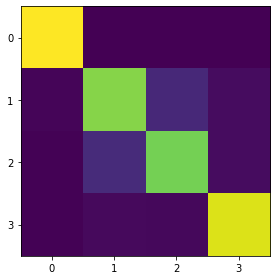

In [57]:
# Test CNN
# load best model
best_path = "~/CS464_Fall21_HW3/best_cnn_transfer.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
with torch.no_grad():
# iterate over test batches
  test_idx = 0
  y_true = None
  y_pred = None
  test_loss = 0
  for x,y in tqdm(test_loader):
    test_idx += 1

    output = model(x)
    batch_loss = loss_fuc(output, y)
    test_loss += batch_loss
    if test_idx == 1:
      y_true = y.cpu().numpy()
      y_pred = np.argmax(output.cpu().numpy(), axis=-1)
    else:
      y_true = np.concatenate((y_true, y.cpu().numpy()), axis=-1)
      y_pred = np.concatenate((y_pred, np.argmax(output.cpu().numpy(), axis=-1)), axis=-1)

  losses = test_loss / test_idx
#   get confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
#   calculate accuracy
acc = accuracy_score(y_true, y_pred)
#   calculate precision
pre = precision_score(y_true, y_pred, average='macro')
#   calculate recall
recall = recall_score(y_true, y_pred, average='macro')
#   calculate F1 score
f1 = f1_score(y_true, y_pred, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()